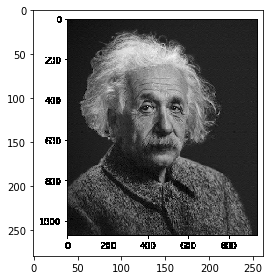

(280, 262)

In [11]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mat=io.imread("Assets/einstein1.png", as_gray=True)
io.imshow(mat)
plt.show()
mat.shape

In [38]:
def lowRankApprox(image, num_vector):
    u, s, vh = np.linalg.svd(image, full_matrices = True)

    u_lowrank = u[:, :num_vector]
    s_lowrank = np.diag(s)[:num_vector,:num_vector]
    vh_lowrank = vh[:num_vector, :]

    image_lowrank = u_lowrank.dot(s_lowrank).dot(vh_lowrank)

    return image_lowrank


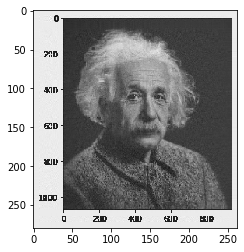

In [41]:
# low rank approximation using fewer vectors
image_lowrank = lowRankApprox(mat, num_vector=80)
plt.imshow(image_lowrank, cmap='gray')
plt.show()

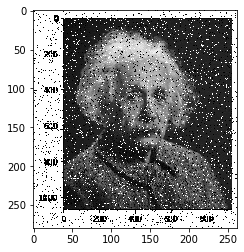

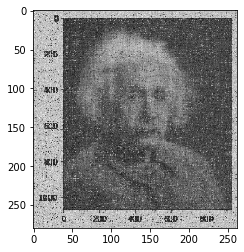

In [74]:
# denoising using SVD
#import cv2
from skimage.util import random_noise
noise = np.random.normal(0,1,(mat.shape[0],mat.shape[1]))
mat_noisy = mat + noise

mat_noisy = random_noise(mat, mode='s&p',amount=0.1)

plt.imshow(mat_noisy, cmap='gray')
plt.show()

mat_denoise = lowRankApprox(mat_noisy, num_vector=50)
plt.imshow(mat_denoise, cmap='gray')
plt.show()
